In [37]:
#Importing all the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats

print("Lending Case Study")

# Read loan.csv as a data frame
loan = pd.read_csv("data/loan.csv",dtype=object)
print(loan.shape) 

Lending Case Study
(39717, 111)


In [ ]:
# Find how many columns and rows contains missing values
print(loan.isnull().all(axis=0).sum())  # check in columns - 54 columns have missing values
print(loan.isnull().all(axis=1).sum())  # check in rows   - 0 columns have missing values

# drop columns which has missing values
loan.dropna(axis='columns',how='all',inplace=True)
print(loan.isnull().all(axis=0).sum())
print(loan.info())

In [ ]:
# Check any duplicate entry in any of the row
duplicate_rows = loan.duplicated().sum()
print(duplicate_rows)

# Univariate Analysis - Categorical data - loan_status
# As loan_status (Fully Paid, Charged Off, Current) is the important key, getting percentage distribution of this.
loan_stat_percentage = (loan.loan_status.value_counts(normalize=True)*100).round(2)

# plot loan_status to view percentage distribution
# Plot the percentage distribution
bar_plot = sns.barplot(x=loan_stat_percentage.index,y=loan_stat_percentage, color='skyblue')

# Add values to each bar
for index, value in enumerate(loan_stat_percentage):
    bar_plot.text(index, value + 0.5, f'{value:.1f}%', ha='center', va='bottom', fontsize=10)

plt.title('Percentage Distribution of Loan Types')
plt.xlabel('Loan Type')
plt.ylabel('Percentage')
plt.show() 

#Observation - Maximum Number (Around 83%) of people able to repay their loan 

In [ ]:
# Univariate Analysis - loan_purpose
loan_purpose_percentage = (loan.purpose.value_counts(normalize=True)*100).round(2)

# plot loan_status to view percentage distribution
# Plot the percentage distribution
bar_plot = sns.barplot(x=loan_purpose_percentage.index,y=loan_purpose_percentage, color='skyblue')

# Add values to each bar
for index, value in enumerate(loan_purpose_percentage):
    bar_plot.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=8)
    
plt.xticks(rotation=90)
plt.title('Percentage Distribution of Purpose for which loan was taken')
plt.xlabel('Purpose')
plt.ylabel('Percentage')
plt.show() 

#Observation - Maximum Number (Around 46.9%) taken for debt_consolidation

In [ ]:
# Univariate Analysis - state (which state people took more loan)
loan_state_percentage = (loan.addr_state.value_counts(normalize=True)*100).round(2)

#AS more states, state values are collapsing so adjusting width here
plt.figure(figsize=(20,5))

# plot state to view percentage distribution
# Plot the percentage distribution
bar_plot = sns.barplot(x=loan_state_percentage.index,y=loan_state_percentage, color='skyblue')

# Add values to each bar
for index, value in enumerate(loan_state_percentage):
    bar_plot.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=6)
     
plt.xticks(rotation=90)
plt.title('Percentage Distribution of states where people took more number of loans')
plt.xlabel('state')
plt.ylabel('Percentage')
plt.show() 

#Observation - state CA has maximum number of borrower

In [ ]:
# Univariate Analysis - term


# plot state to view percentage distribution
# Plot the percentage distribution
term  = loan['term'].replace('\D','',regex=True)

loan_term_percentage = (term.value_counts(normalize=True)*100).round(2)

bar_plot = sns.barplot(x=loan_term_percentage.index,y=loan_term_percentage, color='skyblue')

# Add values to each bar
for index, value in enumerate(loan_term_percentage):
    bar_plot.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=6)
     
plt.xticks(rotation=90)
plt.title('Percentage Distribution of short and long term loans')
plt.xlabel('term')
plt.ylabel('Percentage')
plt.show() 

#Observation - People are interested to take short term compared to long term loans

int64
count    39717.00
mean      9579.94
std       5120.00
min        500.00
25%       5500.00
50%      10000.00
75%      12025.00
max      23975.00
Name: loan_amnt, dtype: float64
count    39717.00
mean      9579.94
std       5120.00
min        500.00
25%       5500.00
50%      10000.00
75%      12025.00
max      23975.00
Name: loan_amnt, dtype: float64


<Axes: >

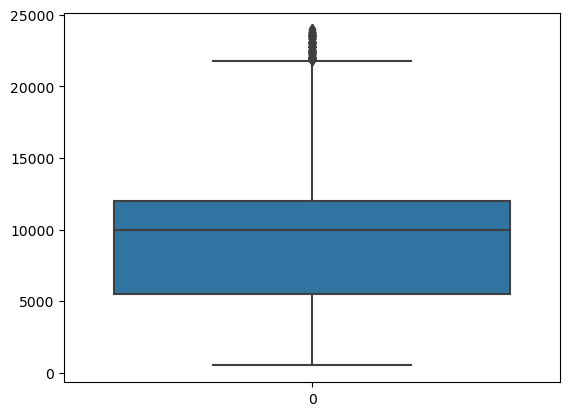

In [42]:
# Univariate Analysis - loan_amount - It is a numerical data so we can extract statistics

#Check the type of loan amount
print(loan.loan_amnt.dtypes) #It is of object type so convert to number

loan['loan_amnt'] = pd.to_numeric(loan['loan_amnt'], errors='coerce')

print(loan['loan_amnt'].describe().round(2))

# Identifying outlier using Interquartile range
z = np.abs(stats.zscore(loan['loan_amnt']))

threshold = 3
#outliers = df[z > threshold]

#print(len(outliers))
# replace outliers with median value
loan.loc[z > threshold, 'loan_amnt'] = loan['loan_amnt'].median()

print(loan['loan_amnt'].describe().round(2))

sns.boxplot(loan['loan_amnt'])

In [ ]:
# Univariate Analysis - verification_status
Ver_status_percentage = (loan.verification_status.value_counts(normalize=True)*100).round(2)

# plot state to view percentage distribution
# Plot the percentage distribution
bar_plot = sns.barplot(x=Ver_status_percentage.index,y=Ver_status_percentage, color='skyblue')

# Add values to each bar
for index, value in enumerate(Ver_status_percentage):
    bar_plot.text(index, value, f'{value:.1f}%', ha='center', va='bottom', fontsize=6)
     
#plt.xticks(rotation=90)
plt.title('Percentage Distribution of Verification status of borrower')
plt.xlabel('Verification Status')
plt.ylabel('Percentage')
plt.show() 

#Observation - state CA has maximum number of borrower

C:\Users\tejas\AppData\Local\Temp\ipykernel_8668\698527170.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  loan_correlation = loan.corr()


ValueError: The number of observations cannot be determined on an empty distance matrix.

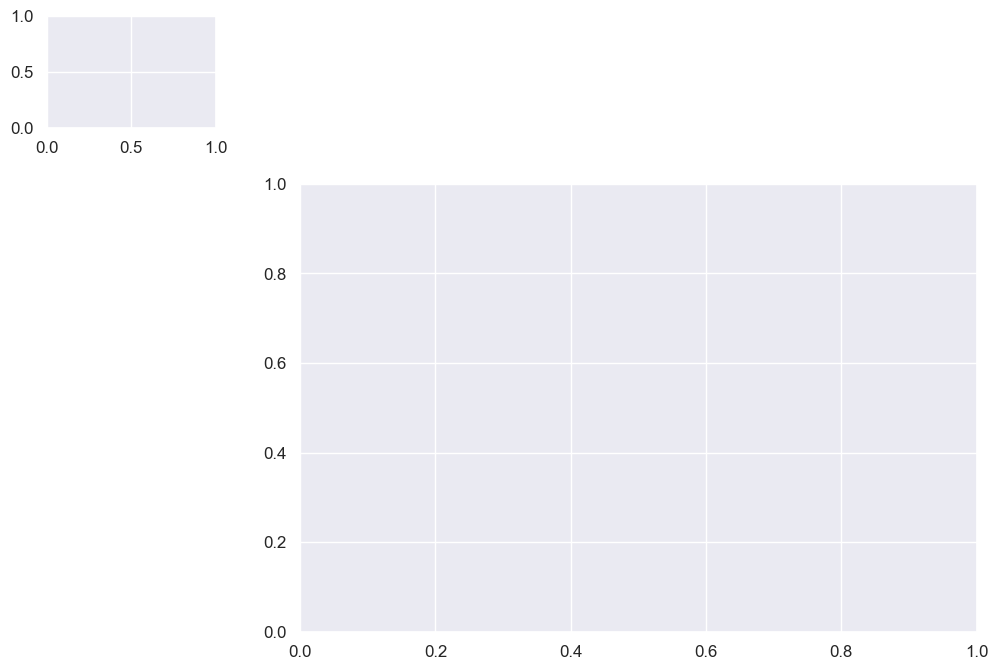

In [43]:
# Select columns for which you want to calculate correlation
selected_columns = ['total_pymnt', '', 'C']

# Calculate correlation for selected columns
loan_correlation = loan[selected_columns].corr()

sns.set(font_scale=1.1)
sns.clustermap(loan_correlation,annot=True,figsize=(12, 8),cmap="BrBG")
plt.show()

In [46]:
# Derive month and year column for more analysis
loan['issue_d'] = pd.to_datetime(loan['issue_d'], format='%b-%y')

loan['year'] =loan['issue_d'].dt.year
loan['month']=loan['issue_d'].dt.month
